<h1> Prediction using Unsupervised ML</h1>

<h2>To be submited to TSF</h2>

<ul>
    <li><h5>Names:</h5> <h2>Felix Hirwa Nshuti</h2></li>
    <li><h5>Track:</h5> <h3>Data Science and Business Analytics</h3></li>
    <li><h5>Task: </h5> <h3>2</h3></li>
    <li><h5>Data Source:</h5><h3><a href="https://bit.ly/3kXTdox" target="_blank">https://bit.ly/3kXTdox</a></h3></li>
    </ul>

<h2>Table of Contents</h2>
<p>In this project, you will classify  Fashion-MNIST dataset using convolutional neural networks.</p>
<ul>
  

<li><a href="#Preparation">Data Processing</a></li>
<li><a href="#cluster">K Means Clustering</li>
<li><a href="#viz">Clusters Visualization</a></li>

</ul>
 


<h2>Importing the required Libraries</h2>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

<h3>Function to plot the behaviour of each cluster</h3>

In [2]:
def plot_clus(x,y):
    plt.plot(x,y)
    plt.title("The Elbow method")
    plt.xlabel("Clusters")
    plt.ylabel("Sum of squares")
    plt.show()
    sns.set(rc={"figure.figsize":(7,7)})

<h2 id="Preparation"> Data Processing<h2>

In [3]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Checking Null Variables

In [4]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Describing Data

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Data Visualization

In [6]:

data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Ploting the pairPlot

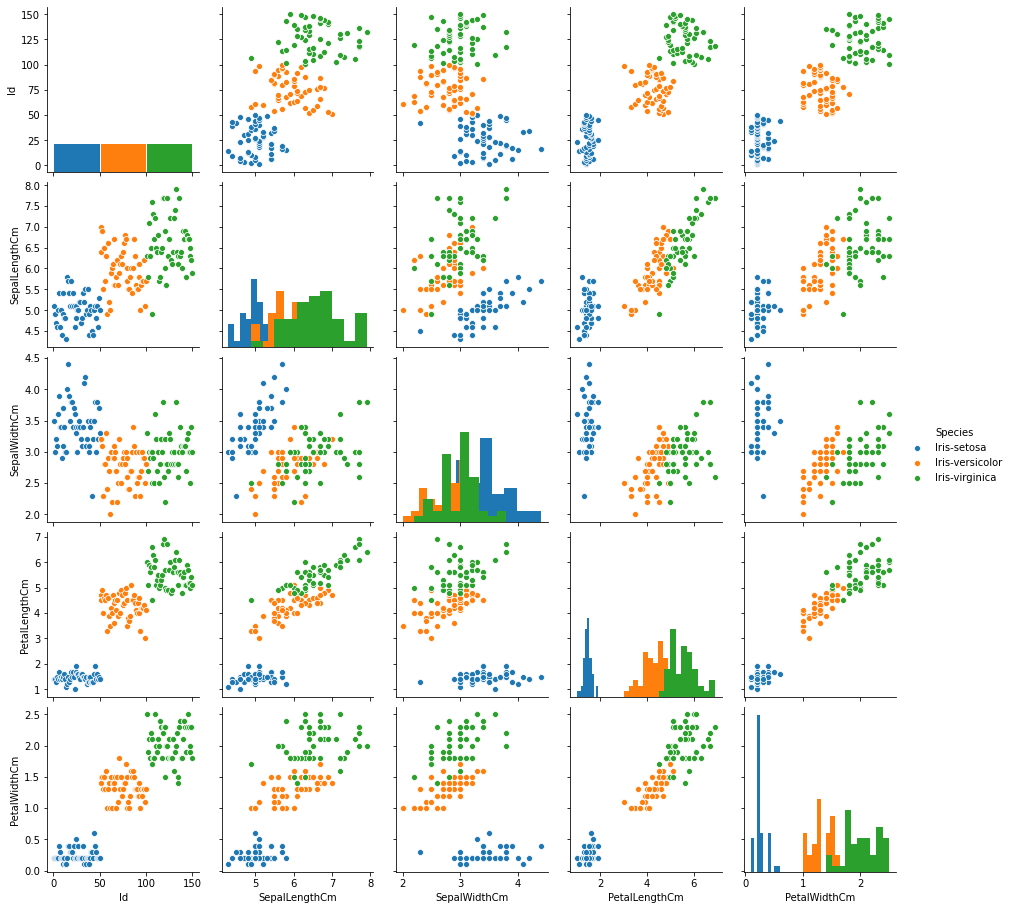

In [7]:
import seaborn as sns
sns.pairplot(data, hue = 'Species',diag_kind="hist")

Dataset Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BFF3A69DF0>,
      dtype=object)

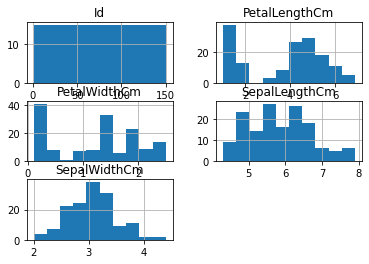

In [8]:
data.hist()

As Variable Id doesn't have effect on Species we need to drop it

In [9]:
select_data=data.drop(["Id"],axis=1)
select_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Selecting Variables to cluster

In [10]:
from sklearn.preprocessing import StandardScaler
x=(select_data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]).values
y=(select_data["Species"]).values
x=StandardScaler().fit(x).transform(x)
x[0:5]


array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

<h2 id="cluster"> K Means Algorithm</h2>

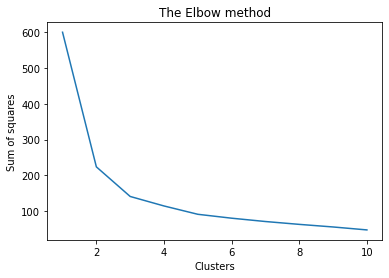

In [11]:
#Selecting the best Value of Clusters

from sklearn.cluster import KMeans
from sklearn import metrics
k=11
sqrs=[]
for n in range(1,k):
    neigh = KMeans(n_clusters = n, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    neigh.fit(x)
    sqrs.append(neigh.inertia_)
    
# Plotting the performance of clusters to see which one can we use to observe 'The elbow'
plot_clus(range(1,k),sqrs)


<p>Here the best clusters number is 3</p><br> And now we are good to go and build our model</br>

In [12]:
clusters=3
model=KMeans(n_clusters = clusters, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
y_k=model.fit_predict(x)
labels=model.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


<p>Assign labels to each row in dataset</p>

In [13]:
select_data["Species"] = labels
select_data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


<h2 id ="viz">Ploting the data to see how clusters are distributed</h2>

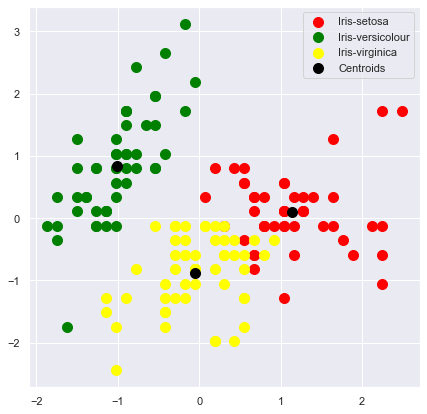

In [14]:

plt.scatter(x[y_k == 0, 0], x[y_k == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_k == 1, 0], x[y_k == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_k == 2, 0], x[y_k == 2, 1],
            s = 100, c = 'yellow', label = 'Iris-virginica')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
plt.legend()

sns.set(rc={'figure.figsize':(10,8)})



<h1>Felix Hirwa Nshuti</h1>

### Thank you !!!

## Author

<h3>Felix Hirwa Nshuri</h3>

<ul>
    <li><a href="https://www.linkedin.com/in/hirwa-nshuti/" target="_blank">LinkedIn Profile</a></li>
    <li><a href="https://github.com/hirwa-nshuti" target="_blank">Github Profile</a></li>
</ul>

## Done at
     2021-02-03        

## <h3 align="center"> The Sparks Foundation Internship <h3/>